### Tổng quan chương trình nghiên cứu

In [ ]:
import pandas as pd

### Insight các thành viên tham gia chương trình nghiên cứu

In [6]:
def analyze_user_data(file_path):
    """
    Phân tích dữ liệu từ các cột 'Định hướng hoạt động GIAI ĐOẠN 1',
    'Mục tiêu, kết quả bản thân mong muốn' và 'Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI'
    trong file CSV.

    Args:
        file_path (str): Đường dẫn đến file CSV.

    Returns:
        dict: Một từ điển chứa kết quả phân tích.
    """
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        return {"error": f"File '{file_path}' not found. Please check the path."}
    except Exception as e:
        return {"error": f"An error occurred while reading the file: {e}"}

    results = {}

    # --- Phân tích cột 'Định hướng hoạt động GIAI ĐOẠN 1' ---
    if 'Định hướng hoạt động GIAI ĐOẠN 1' in df.columns:
        df['Định hướng hoạt động GIAI ĐOẠN 1'] = df['Định hướng hoạt động GIAI ĐOẠN 1'].astype(str).str.strip()
        count_nghien_cuu = df['Định hướng hoạt động GIAI ĐOẠN 1'].apply(lambda x: bool(re.search(r'Hướng nghiên cứu', x, re.IGNORECASE))).sum()
        results['So_nguoi_huong_nghien_cuu'] = int(count_nghien_cuu)
        count_ung_dung = df['Định hướng hoạt động GIAI ĐOẠN 1'].apply(lambda x: bool(re.search(r'Hướng ứng dụng', x, re.IGNORECASE))).sum()
        results['So_nguoi_huong_ung_dung'] = int(count_ung_dung)
    else:
        results['So_nguoi_huong_nghien_cuu'] = "Cột 'Định hướng hoạt động GIAI ĐOẠN 1' không tìm thấy."
        results['So_nguoi_huong_ung_dung'] = "Cột 'Định hướng hoạt động GIAI ĐOẠN 1' không tìm thấy."


    # --- Phân tích cột 'Mục tiêu, kết quả bản thân mong muốn' ---
    if 'Mục tiêu, kết quả bản thân mong muốn' in df.columns:
        df['Mục tiêu, kết quả bản thân mong muốn'] = df['Mục tiêu, kết quả bản thân mong muốn'].fillna('')
        count_paper_mentions = df['Mục tiêu, kết quả bản thân mong muốn'].apply(lambda x: bool(re.search(r'paper', str(x), re.IGNORECASE))).sum()
        results['So_muc_tieu_chua_tu_paper'] = int(count_paper_mentions)
    else:
        results['So_muc_tieu_chua_tu_paper'] = "Cột 'Mục tiêu, kết quả bản thân mong muốn' không tìm thấy."

    # --- Phân tích cột 'Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI' ---
    if 'Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI' in df.columns:
        # Điền các giá trị NaN bằng chuỗi rỗng và chuyển sang chữ thường để dễ dàng so sánh
        df['Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI'] = df['Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI'].fillna('').astype(str).str.lower()

        # Đếm số lượng người có từ "Computer Vision" hoặc "CV"
        # Sử dụng re.search để tìm kiếm bất kỳ đâu trong chuỗi
        count_cv = df['Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI'].apply(lambda x: bool(re.search(r'computer vision|cv', x))).sum()
        results['So_nguoi_CV'] = int(count_cv)

        # Đếm số lượng người có từ "LLM"
        count_llm = df['Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI'].apply(lambda x: bool(re.search(r'llm', x))).sum()
        results['So_nguoi_LLM'] = int(count_llm)

        # Đếm số lượng người có từ "NLP" hoặc "Natural Language Processing"
        count_nlp = df['Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI'].apply(lambda x: bool(re.search(r'nlp|natural language processing', x))).sum()
        results['So_nguoi_NLP'] = int(count_nlp)

    else:
        results['So_nguoi_CV'] = "Cột 'Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI' không tìm thấy."
        results['So_nguoi_LLM'] = "Cột 'Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI' không tìm thấy."
        results['So_nguoi_NLP'] = "Cột 'Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI' không tìm thấy."

    return results

# --- Cách sử dụng hàm ---
file_path = '2025.07.29 AIVNRG25 Supporter vs Member List.xlsx - Final List.csv'
analysis_results = analyze_user_data(file_path)

# In kết quả
for key, value in analysis_results.items():
    print(f"{key}: {value}")

So_nguoi_huong_nghien_cuu: 339
So_nguoi_huong_ung_dung: 113
So_muc_tieu_chua_tu_paper: 111
So_nguoi_CV: 200
So_nguoi_LLM: 185
So_nguoi_NLP: 185


### Thống kê về Các lĩnh vực, khía cạnh, chủ đề quan tâm trong AI 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '2025.07.29 AIVNRG25 Supporter vs Member List.xlsx - Final List.csv'
df = pd.read_csv(file_path)
ai_interests = df['Các lĩnh vực, khía cạnh, chủ đề quan tâm trong AI'].dropna()

all_topics = []
for entry in ai_interests:
    if pd.notna(entry) and str(entry).strip():
        topics = str(entry).split(',')
        for topic in topics:
            cleaned_topic = topic.strip()
            if cleaned_topic:
                all_topics.append(cleaned_topic)

topic_counts = pd.Series(all_topics).value_counts()

total_responses = len(ai_interests)
topic_stats = pd.DataFrame({
    'Lĩnh vực/Chủ đề': topic_counts.index,
    'Số lượng': topic_counts.values,
    'Tỷ lệ (%)': (topic_counts.to_numpy() / total_responses * 100).round(2),
})

topic_stats = topic_stats.sort_values('Số lượng', ascending=False)

topic_stats.to_csv('thong_ke_linh_vuc_AI.csv', index=False, encoding='utf-8-sig')


In [ ]:
topic_stats['Lĩnh vực/Chủ đề']

,Lĩnh vực/Chủ đề,Số lượng,Tỷ lệ (%)
0,NLP,78,17.65
1,Computer Vision,60,13.57
2,LLM,38,8.60
3,CV,21,4.75
4,AI Agent,20,4.52
...,...,...,...
688,Banking and Finace,1,0.23
689,Insurance,1,0.23
690,E-commerce and Retail,1,0.23
691,National security and defense,1,0.23


### Khảo sát từ khóa các lĩnh vực và khía cạnh AI

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '2025.07.29 AIVNRG25 Supporter vs Member List.xlsx - Final List.csv'
df = pd.read_csv(file_path)
ai_interests = df['Các lĩnh vực, khía cạnh, chủ đề quan tâm trong AI'].dropna()

all_topics = []
for entry in ai_interests:
    if pd.notna(entry) and str(entry).strip():
        topics = str(entry).split(',')
        for topic in topics:
            cleaned_topic = topic.strip()
            if cleaned_topic:
                all_topics.append(cleaned_topic)

print(all_topics)

['VLM', 'Y tế và Computer vision', 'Hình ảnh học', 'LLM trong Y học', 'NLP', 'CV', 'Data Analyst', 'BA', 'MBA', 'Vision Language model', 'MLLM', 'AI Agent', 'Health care', 'Computer Vision', 'LLM', 'Agentic AI', 'LLM Reasoning', 'AI for Scientific Discovery', 'Ứng dụng AI trong xử lí dữ liệu tín hiệu sinh học', 'AI + High Performance Computing', 'Multilingual NLP', 'AI in Education & Cognitive Science', 'AI for Finance & Compliance', 'AI in Digital Health', 'Responsible AI & AI Ethics', 'AI in Robotics', 'Green AI', 'Ứng dụng của AI/ML trong lĩnh vực Finance và Economic', '1 số định hướng hiện tại:\n+ Nghiên cứu các mô hình dự báo (ARIMA', 'SARIMA', 'GARCH', 'etc) trong (1) dự báo tăng trưởng kinh tế', '(2) biến động giá các sản phẩm tài chính truyền thống và phi truyền thống\n+ Ứng dụng NLP trong quản trị rủi ro (Example: fraud detection', 'credit score) trong lĩnh vực ngân hàng', 'bảo hiểm \n+ Tự động hóa quá trình tối ưu danh mục đầu tư bằng Reinforcement Learning\n+ Ứng dụng Altern

In [ ]:

#? Write to CSV file
topic_counts = pd.Series(all_topics).value_counts()

total_responses = len(ai_interests)
topic_stats = pd.DataFrame({
    'Lĩnh vực/Chủ đề': topic_counts.index,
    'Số lượng': topic_counts.values,
    'Tỷ lệ (%)': (topic_counts.to_numpy() / total_responses * 100).round(2),
})

topic_stats = topic_stats.sort_values('Số lượng', ascending=False)
topic_stats.to_csv('thong_ke_linh_vuc_AI.csv', index=False, encoding='utf-8-sig')

### Vị trí địa lý của Mọi Thành Viên và Hỗ trợ viên

### GPT Analysis (not so good)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert all text fields to lowercase for easier keyword matching
df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Define keywords that indicate AI for education or user-aligned interests
keywords = [
    "nlp", "llm", "rag", "ai agent", "education", "research",
    "fine-tune", "tune", "learn", "teaching", "tự động", "automate"
]

# Combine relevant columns into a single string for each row
combined_text = (
    df_lower["Định hướng hoạt động GIAI ĐOẠN 1"].fillna('') + ' ' +
    df_lower["Các lĩnh vực, khía cạnh, chủ đề quan tâm trong AI"].fillna('') + ' ' +
    df_lower["Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI"].fillna('') + ' ' +
    df_lower["Mục tiêu, kết quả bản thân mong muốn"].fillna('') + ' ' +
    df_lower["Kỹ năng, lĩnh vực am hiểu"].fillna('')
)

# Create a boolean mask for rows containing any of the keywords
mask = combined_text.apply(lambda text: any(kw in text for kw in keywords))

# Filter the dataset
filtered_df = df[mask]

# === Top 5 most relevant profiles ===
top_5 = filtered_df.head(5)

# === Export filtered list ===
filtered_df.to_csv("filtered_ai_education_profiles.csv", index=False)
filtered_df.head()

C:\Users\boboi\AppData\Local\Temp\ipykernel_15384\2018774418.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_lower = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,No,Mã hoạt động TV/HTV,AIO năm,Đăng ký tham gia hoạt động theo vai trò,Họ và tên,Tên,Email tham gia hoạt động,Tên Facebook,Link Facebook,Định hướng hoạt động GIAI ĐOẠN 1,"Các lĩnh vực, khía cạnh, chủ đề quan tâm trong AI","Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI","Mục tiêu, kết quả bản thân mong muốn","Kỹ năng, lĩnh vực am hiểu",Nơi ở hiện tại
0,1,S24-001,2024,Hỗ trợ viên,Vũ Hữu An,An,anvuleo1204@gmail.com,Vũ Hữu An,https://www.facebook.com/share/1ZSZdiQngK/?mib...,Hướng nghiên cứu,VLM,"Computer Vision, NLP & LLMs, Multimodal",Được học hỏi và phát triển hơn trong lĩnh vực ...,"biết dùng Latex, đọc tìm hiểu bài báo KH, có k...",Hà Nội
2,3,S23-003,2023,Hỗ trợ viên,Nguyễn Tuấn Anh,Anh,bs.ntanh12@gmail.com,Nguyễn Tuấn Anh,https://www.facebook.com/anh.nguyentuan.1422/,Hướng nghiên cứu,"Hình ảnh học, LLM trong Y học","Y tế, Computer Vision, NLP & LLMs",Nghiên cứu chuyên sâu về AI trong Y học và có ...,"Biết dùng Latex, đã từng đăng báo, có nhiều ki...","Thủ Đức, TPHCM"
3,4,S25-004,2025,Hỗ trợ viên,Phạm Tuấn Anh,Anh,anhphamtuan832@gmail.com,Tuan Anh Pham,https://www.facebook.com/tuan.anh.pham.896897/,"Hướng nghiên cứu, Hướng dự án","NLP, CV","NLP & LLMs, Computer Vision","Muốn được tham gia viết báo cùng các TA, để có...","Đã từng có kinh nghiệm viết báo, đã có 1 bài c...",Hà Nội
5,6,S24-006,2024,Hỗ trợ viên,Nguyễn Quốc Bảo,Bảo,lebensmudenguyen@gmail.com,quoc bao nguyen,https://www.facebook.com/share/19AHi4CaNh/,"Hướng nghiên cứu, Hướng dự án","Vision Language model, MLLM, AI Agent","Multimodal, AI Agent, Computer Vision, NLP & LLMs",publish paper ở hội nghị rank cao,"Biết dùng LaTeX, Đã có 1 bài báo khoa học nhỏ ...",tp Hồ Chí Minh
6,7,S25-007,2025,Hỗ trợ viên,Lê Thành Đạt,Đạt,ltd.bqlda7112004@gmail.com,Thanh Dat,https://www.facebook.com/DatdyDark,"Hướng nghiên cứu, Hướng dự án, Hướng ứng dụng",Health care,Y tế,"research paper, PhD scholarship",có kỹ năng code theo yêu cầu :))),"Boston, Massachusetts, USA"


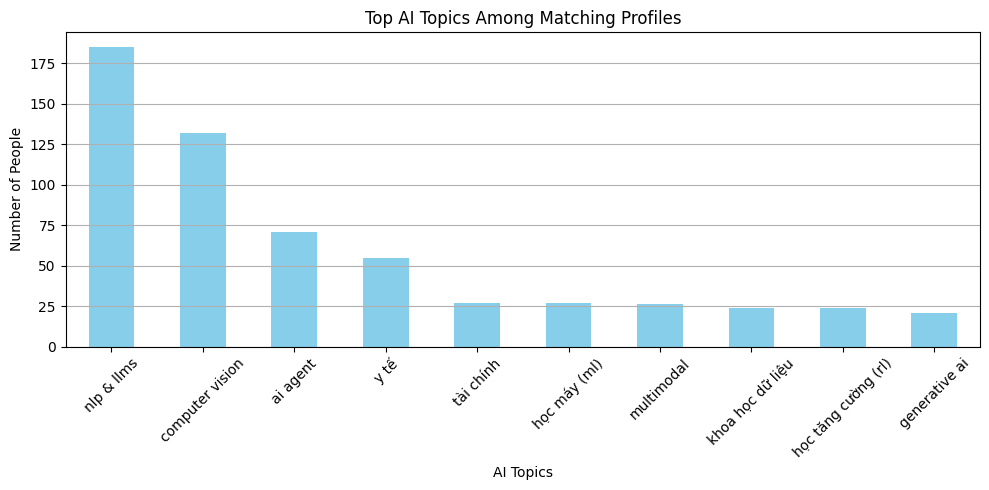

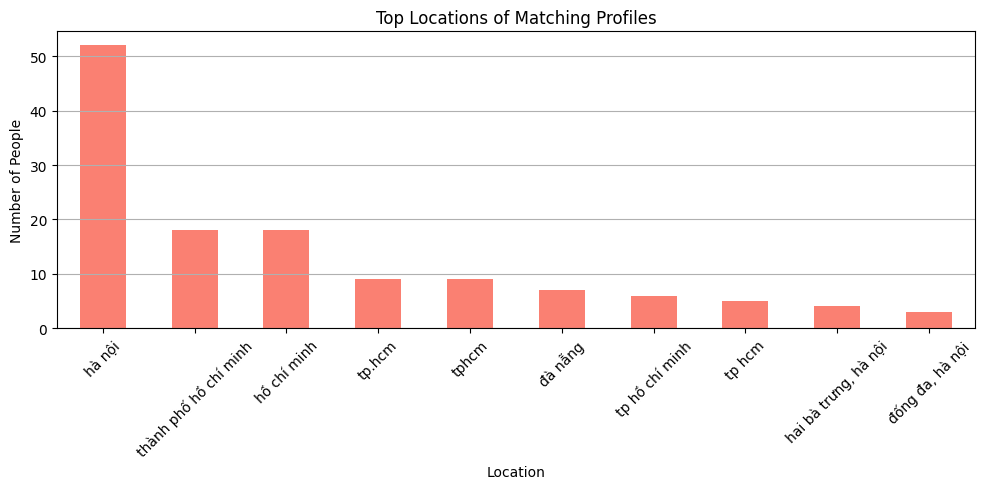

In [7]:
# === Visualization: AI Topics ===
topics = (
    df_lower.loc[mask, "Từ khóa Chuẩn hóa các lĩnh vực, khía cạnh AI"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)

topic_counts = topics.value_counts().head(10)

plt.figure(figsize=(10, 5))
topic_counts.plot(kind='bar', color='skyblue')
plt.title("Top AI Topics Among Matching Profiles")
plt.xlabel("AI Topics")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# === Visualization: Location Demographics ===
locations = (
    df_lower.loc[mask, "Nơi ở hiện tại"]
    .dropna()
    .str.strip()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10, 5))
locations.plot(kind='bar', color='salmon')
plt.title("Top Locations of Matching Profiles")
plt.xlabel("Location")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()
